<a href="https://colab.research.google.com/github/yukimasa0705/math_vector_to_matrix/blob/main/vector_colab_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ベクトル応用パーフェクト演習ノート
このノートは、ベクトルの基本から応用までを演習形式で学ぶためのものです。
Google Colabで開いて、セルを実行しながら進めてください。

## ✅ 0. 準備
必要なライブラリをインポートしておきましょう。

In [ ]:
import numpy as np
from sympy import symbols, Eq, solve, init_printing
init_printing()

## 🔁 1. ベクトルの直交条件
ベクトルが直交する（垂直になる）条件は「内積が0になる」ことです。

例題：ベクトル $A = [1, x, 2]$ と $B = [-1, 2, 1]$ が直交するとき、xの値を求めよ。

In [ ]:
x = symbols('x')
A = np.array([1, x, 2])
B = np.array([-1, 2, 1])
inner_product = A[0]*B[0] + A[1]*B[1] + A[2]*B[2]
Eq(inner_product, 0)

2⋅x + 1 = 0

In [ ]:
solve(Eq(inner_product, 0), x)

[-1/2]

## 📐 2. ベクトルの投影（しゃえい）

### ✅ ベクトルの投影って何なん？

ベクトルAを、ベクトルBの**方向だけに向かって“落とし込む”**ことを「B方向への投影（しゃえい）」って言うねん。  
イメージとしては、太陽の光に照らされて地面に影ができるみたいに、「Aの影をBの方向に落としたらどんなんになる？」っていう感じ。

たとえば、坂道（B）にボールを転がしたときに、「どれくらいの力（A）が坂道の方向に向かって働いてるか？」を知りたいときに使えるんや。

---

### 📏 数式の意味

投影の式はこうや：

$$
\text{proj}_B(A) = \frac{A \cdot B}{|B|^2} \cdot B
$$


これを分解して解説すると：

- $(\mathbf{A} \cdot \mathbf{B})$：AとBの**内積**。これはAとBのなす角度によって変わる。角度が小さいほど値が大きくなる。つまり「AがどれだけBに向かってるか？」を数値で出してくれる。
-$(|\mathbf{B}|^2)$：ベクトルBの長さの2乗。内積の結果をBの大きさで調整するために必要やねん。
- 全体として：Bの方向に向かって、Aがどれくらい“寄り添ってるか”を示すベクトルになる。

---


### 🔍 どこで使うん？

- **物理**：力の分解（たとえば坂道の上にモノを置いたとき）
- **機械学習**：主成分分析（PCA）とかで、高次元のデータを低次元に落とし込むとき
- **CG/ゲーム**：物体の動きや光の方向を計算するとき

---

### 🗣 まとめると！

- 投影は「ベクトルを他のベクトルの方向に落とし込んだらどうなるか？」っていう操作
- 方向を抜き出すのに使える
- 式は一見難しそうやけど、内積とスケーリングで成り立ってる
- SymPyなら「式のまま」「意味を保ったまま」計算できるから理解にもバッチリ！


In [ ]:
from sympy import symbols, Matrix, simplify

# ベクトルAとBを定義
A = Matrix([3, 4])
B = Matrix([1, 2])

# 内積とBのノルムの2乗
dot_product = A.dot(B)
norm_squared = B.dot(B)

# 投影ベクトルの計算
projection = simplify((dot_product / norm_squared) * B)

projection


⎡11/5⎤
⎢    ⎥
⎣22/5⎦

### ✏️ 3. ベクトル方程式と直線

### ✅ ベクトル方程式とは？
ベクトル方程式っちゅうのは、**空間や平面の中で直線や平面の位置を、ベクトル（向きと大きさを持つ矢印）を使って表す方法**やねん。

たとえば、「ある点を通って、ある方向に伸びる直線」って聞いたら、それってちょうど「位置ベクトル」と「方向ベクトル」で表現できるやろ？

---

### 📘 ベクトル方程式の基本形

直線のベクトル方程式は、こんな形で表される：

$$
\vec{r}(t) = \vec{P} + t \vec{d}
$$

- $\vec{P}$：出発点（通る点）を示す位置ベクトル（ここでは点 $P=(1,2,3)$）
- $\vec{d}$：進む方向を表す方向ベクトル（ここでは $d=(2,-1,4)$）
- $t$：実数。これを変えることで、直線上のいろんな点を表せる

---

### 🧮 例題

点 $P=(1,2,3)$ を通り、方向ベクトル $d=(2,-1,4)$ に沿った直線のベクトル方程式は：

$$
\vec{r}(t) = \begin{pmatrix}1\\2\\3\end{pmatrix} + t \begin{pmatrix}2\\-1\\4\end{pmatrix}
$$

これはつまり、t にいろんな値を入れることで直線上の点を表していけるってことや。

たとえば：

- $t = 0$ のとき：$\vec{r}(0) = (1,2,3)$（出発点）
- $t = 1$ のとき：$\vec{r}(1) = (3,1,7)$
- $t = -1$ のとき：$\vec{r}(-1) = (-1,3,-1)$

---

つまり、$t$ を動かすと、点 $P$ からベクトル $d$ の方向にどんどん進んでいく線になるっちゅうわけやね！


### 📝 演習問題 1: 直線の方程式

点 \( P = (1, 2, 3) \) を通り、方向ベクトル \( d = (4, -1, 2) \) に沿った直線のベクトル方程式を求めよ。

その後、\( t = 2, 3, 4 \) のときの直線上の点を計算し、プロットしてみてな！

---

### 📝 演習問題 2: 直線と平面の交点

平面の方程式 \( 2x + y - z = 4 \) と、点 \( P = (1, 2, 3) \) を通り、方向ベクトル \( d = (1, 1, -1) \) に沿った直線の交点を求めよ。

つまり、直線と平面の交点を求めるという問題やな。交点があるかどうか、計算してみよう！

---

### 📝 演習問題 3: ベクトル方程式を使った距離計算

点 \( P = (1, 1, 1) \) から直線 \( \vec{r}(t) = (2, 2, 2) + t(1, 1, 1) \) までの距離を求めよ。

直線から点までの最短距離を計算する問題やけど、このベクトル方程式を使うとスムーズにいくはずや！


二問目

点 $P=(1,2,3)$ を通り、方向ベクトル $d=(1, 1, -1) $ に沿った直線のベクトル方程式は：

$$
\vec{r}(t) = \begin{pmatrix}1\\2\\3\end{pmatrix} + t \begin{pmatrix}1\\1\\-1\end{pmatrix}
$$

In [ ]:
from sympy import symbols, Eq, solve

# シンボルの定義
t = symbols('t')

# 直線の式（x, y, z）
x = 1 + t
y = 2 + t
z = 3 - t

# 平面の式：2x + y - z = 4 に代入
plane_eq = Eq(2*x + y - z, 4)

# t を解く
t_sol = solve(plane_eq, t)[0]
print(f"tの解は: {t_sol}")
# 解を直線の式に代入して交点を求める
intersection_point = (x.subs(t, t_sol), y.subs(t, t_sol), z.subs(t, t_sol))

print(f"交点の座標は: {intersection_point}")


tの解は: 3/4
交点の座標は: (7/4, 11/4, 9/4)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 初期の点（通る点）と方向ベクトル
P = np.array([1, 2, 3])
d = np.array([4, -1, 2])

# tの値
t_values = [2, 3, 4]

# 各tにおける直線上の点を計算
points = [P + t * d for t in t_values]

# 点を出力
for i, t in enumerate(t_values):
    print(f"t = {t} → 点: {points[i]}")


t = 2 → 点: [9 0 7]
t = 3 → 点: [13 -1  9]
t = 4 → 点: [17 -2 11]


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32218 (\N{CJK UNIFIED IDEOGRAPH-7DDA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12463 (\N{KATAKANA LETTER KU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, 

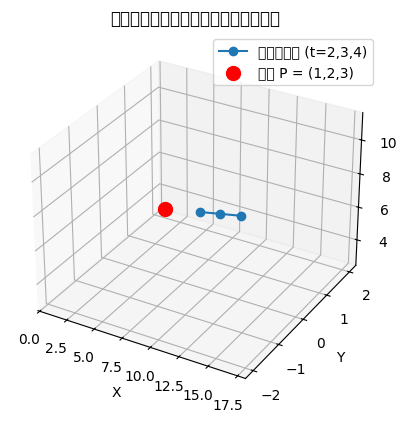

In [ ]:
# x, y, zをそれぞれ抽出
x_vals = [point[0] for point in points]
y_vals = [point[1] for point in points]
z_vals = [point[2] for point in points]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 直線の点を線で結ぶ
ax.plot(x_vals, y_vals, z_vals, label='直線上の点 (t=2,3,4)', marker='o')

# 元の点Pもプロットしてみよう
ax.scatter(*P, color='red', label='始点 P = (1,2,3)', s=100)

# ラベルと凡例
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_title('直線のベクトル方程式に沿った点たち')

plt.show()


## 🧮 4. 外積と平行四辺形の面積
ベクトル $A$ と $B$ が張る平行四辺形の面積は、外積の大きさです。
$$|\vec{A} \times \vec{B}|$$

In [ ]:
A = np.array([1,2,3])
B = np.array([4,5,6])
np.linalg.norm(np.cross(A, B))

## 🧊 5. 三重積と平行六面体の体積
$$|\vec{A} \cdot (\vec{B} \times \vec{C})|$$
が体積になります。

In [ ]:
C = np.array([7,8,9])
abs(np.dot(A, np.cross(B, C)))

## 📝 演習問題（自分でやってみよう）
- ベクトル $A = [2, x, 5]$ が $B = [1, 3, 2]$ と直交するとき、xの値を求めよ。
- ベクトル $A = [1, 2]$ を $B = [2, -2]$ に射影せよ。
- 点 $(2,0,1)$ を通り、ベクトル $(1,2,2)$ に沿った直線の方程式を導け。

In [ ]:
# ここに自分で書いてみよう！
# 一問目
x = symbols('x')
A = np.array([2,x,5])
B = np.array([1,3,2])
inner_product = A[0]*B[0] + A[1]*B[1] + A[2]*B[2]
Eq(inner_product, 0)
solve(Eq(inner_product, 0), x)

[-4]

In [ ]:
# 二問目
A = np.array([1,2])
B = np.array([2,-2])
proj = (np.dot(A, B) / np.dot(B, B)) * B
proj

array([-0.5,  0.5])

In [ ]:
# 三問目
t = symbols('t')
P = np.array([2,0,1])
d = np.array([1,2,2])
P + t*d


array([t + 2, 2*t, 2*t + 1], dtype=object)